# Mini-Project for Fundamentals of Machine Learning Course
In this study, facial expression recognition was performed on the face images from the Facial Expression Recognition Challenge (FER2013) dataset.

One motivation for representation learning is that learning algorithms can design features more effectively and efficiently than humans can. However, this challenge does not explicitly require entries to use representation learning. The dataset, assembled from the internet, is designed for facial expression classification.

The data consists of grayscale images of faces, each measuring 48x48 pixels. The faces have been automatically aligned to be roughly centered and occupy a similar area within each image. The task is to categorize each face based on the emotion expressed, assigning it to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains a total of 35,887 examples.

## 1. Prerequisite
This section provides some basic steps for accessing and visualizing the dataset.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
def parse_data(data: pd.DataFrame):
    """
    Reads input dataframe then return arrays of images and labels
    """
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))

    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image

    return image_array, image_label

In [3]:
def show_img(images: np.ndarray, labels: np.ndarray):
    """
    Visualize images and labels respectively
    """
    _, axarr=plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
    axarr=axarr.flatten()
    for idx, label in enumerate(labels[:10]):
        axarr[idx].imshow(images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Label:{}".format(label))

In [4]:
# Load dataset here
df = pd.read_csv("../data/icml_face_data.csv")

print(f"Shape of the dataset: {df.shape}")
df.head()

Shape of the dataset: (35887, 2)


,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


The ```emotion``` column contains a numeric code ranging from 0 to 6, inclusive, for the emotion expressed by the image. The "pixels" column contains a string surrounded in quotes for each image.

In [5]:
# Parsing data here
images, labels = parse_data(df)

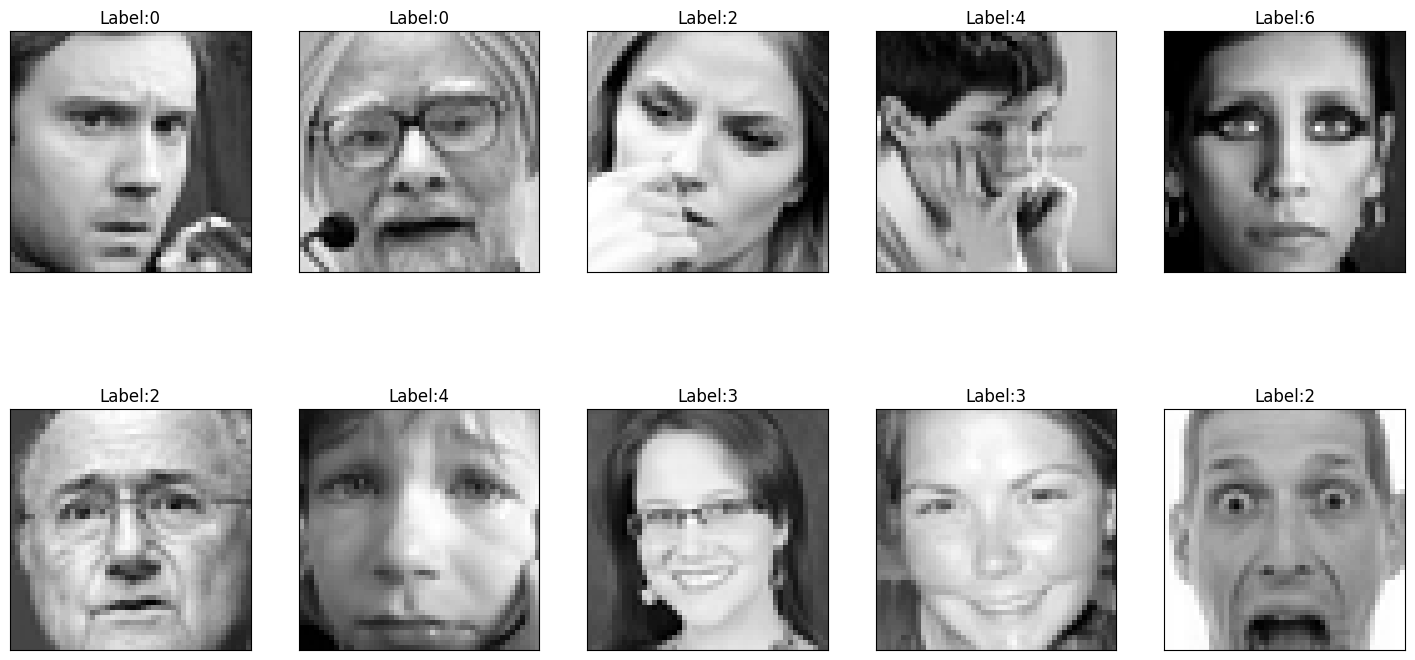

In [6]:
# Showing images here
show_img(images, labels)

In [7]:
# Show number of images
print(f"Number of images: {len(images)}")
print(f"Number of labels: {len(np.unique(labels))}")

Number of images: 35887
Number of labels: 7


In [8]:
images.shape

(35887, 48, 48)

In [9]:
images.reshape(images.shape[0], -1).shape

(35887, 2304)

## 2. Principle Component Analysis

Unsupervised learning can be further categorized into two main tasks: data transformation and clustering. In this study, we will focus on data transformation using unsupervised learning techniques. These techniques aim to modify the data to make it easier for computers and humans to analyze and understand.

One of the most common applications of unsupervised data transformation is dimensionality reduction. This process reduces the number of features (dimensions) in the data. When the data has a high number of features, it can be computationally expensive and difficult to analyze. Dimensionality reduction techniques help to overcome these challenges.

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction. It transforms the data into a new set of features called principal components (PCs). These PCs are ordered by their importance, capturing the most significant variations in the data. By selecting a subset of the most informative PCs, we can achieve a significant reduction in data size while preserving the essential information for analysis.

Question 1: Can you visualize the data projected onto two principal components? (2 points)

In [10]:
from sklearn.decomposition import PCA


def plot_pca_single_image(pca, image):
    """
    Plot the PCA with n_components
    """
    data = pca.transform(image.reshape(1, -1))
    image_pca = pca.inverse_transform(data)

    plt.imshow(image_pca.reshape(48, 48), cmap='gray')
    return image_pca

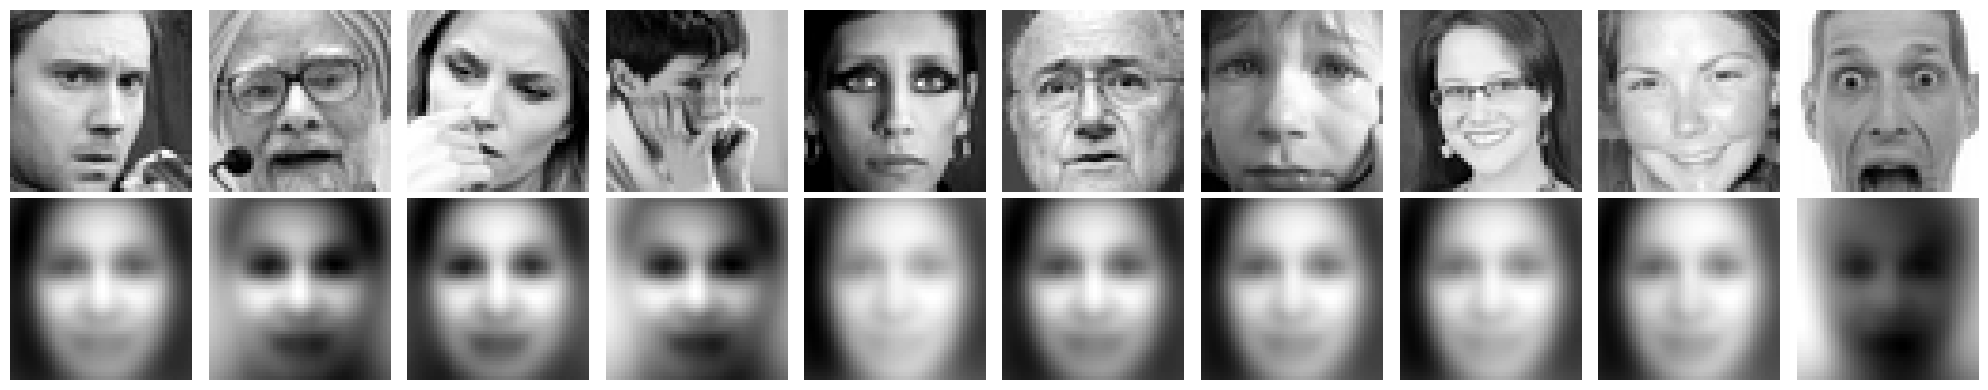

In [11]:
pca = PCA(n_components=2)
pca.fit(images.reshape(images.shape[0], -1))
plt.figure(figsize=(20, 4))

# For the first 10 images
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    plt.subplot(2, 10, i+11)
    plot_pca_single_image(pca, images[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

Question 2: How to determine the optimal number of principal components using ```pca.explained_variance_```? Explain your selection process. (2 points)

In [12]:
pca = PCA()
pca.fit(images.reshape(images.shape[0], -1))

# Get the cummulative explained variance ratio
cumsum = np.cumsum(pca.explained_variance_ratio_) * 100

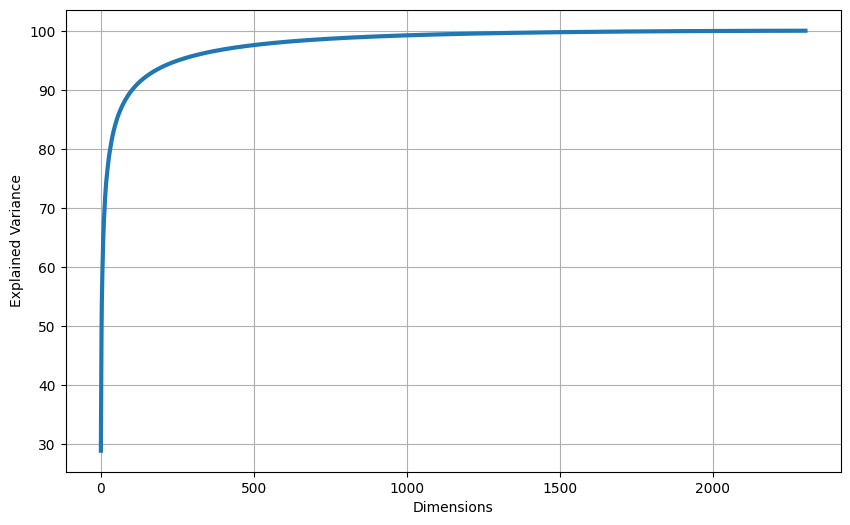

In [13]:
# Print full explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(cumsum, linewidth=3)
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.grid()
plt.show()

The plot shows a steep increase in explained variance at the beginning, indicating that the first few principal components capture a significant portion of the variance in the data.

As more components are added, the increase in explained variance slows down and eventually plateaus. This indicates that additional components contribute less additional information about the data.

Choosing 95% explained variance as the threshold is reasonable because it captures most of the variance in the data while still reducing the dimensionality significantly. Also it commonly used in practice as a rule of thumb.

In [14]:
k = np.argmax(cumsum > 95)
print(f"Number of components required to explain 95% variance: {k}")

Number of components required to explain 95% variance: 254


With only 254 components, instead of 2304, can explain 95% of the variance in the data. This is a significant reduction in the data size, making it easier to analyze and visualize.

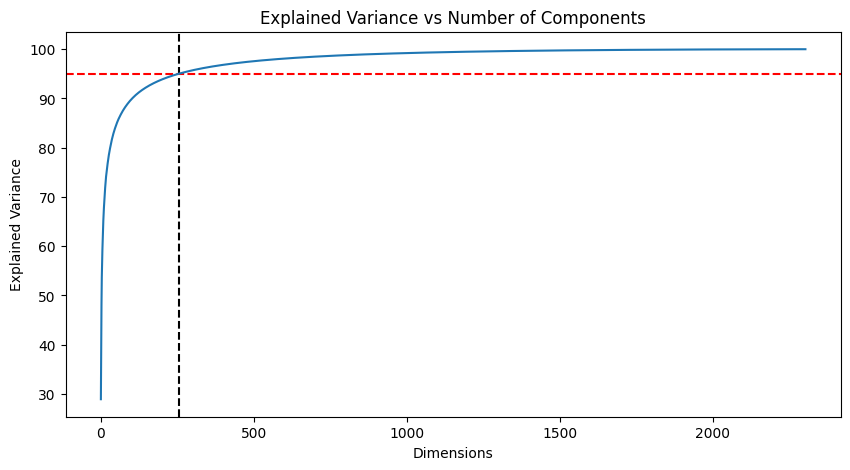

In [15]:
plt.figure(figsize=(10, 5))
plt.title("Explained Variance vs Number of Components")
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.axvline(x=k, color='k', linestyle='--')
plt.axhline(y=95, color='r', linestyle='--')
ax = plt.plot(cumsum)

Take the first image as an example, visualize different number of principal components (2, 10, 50, 100, 254, 500, 1000, 2000) and compare the reconstructed images.

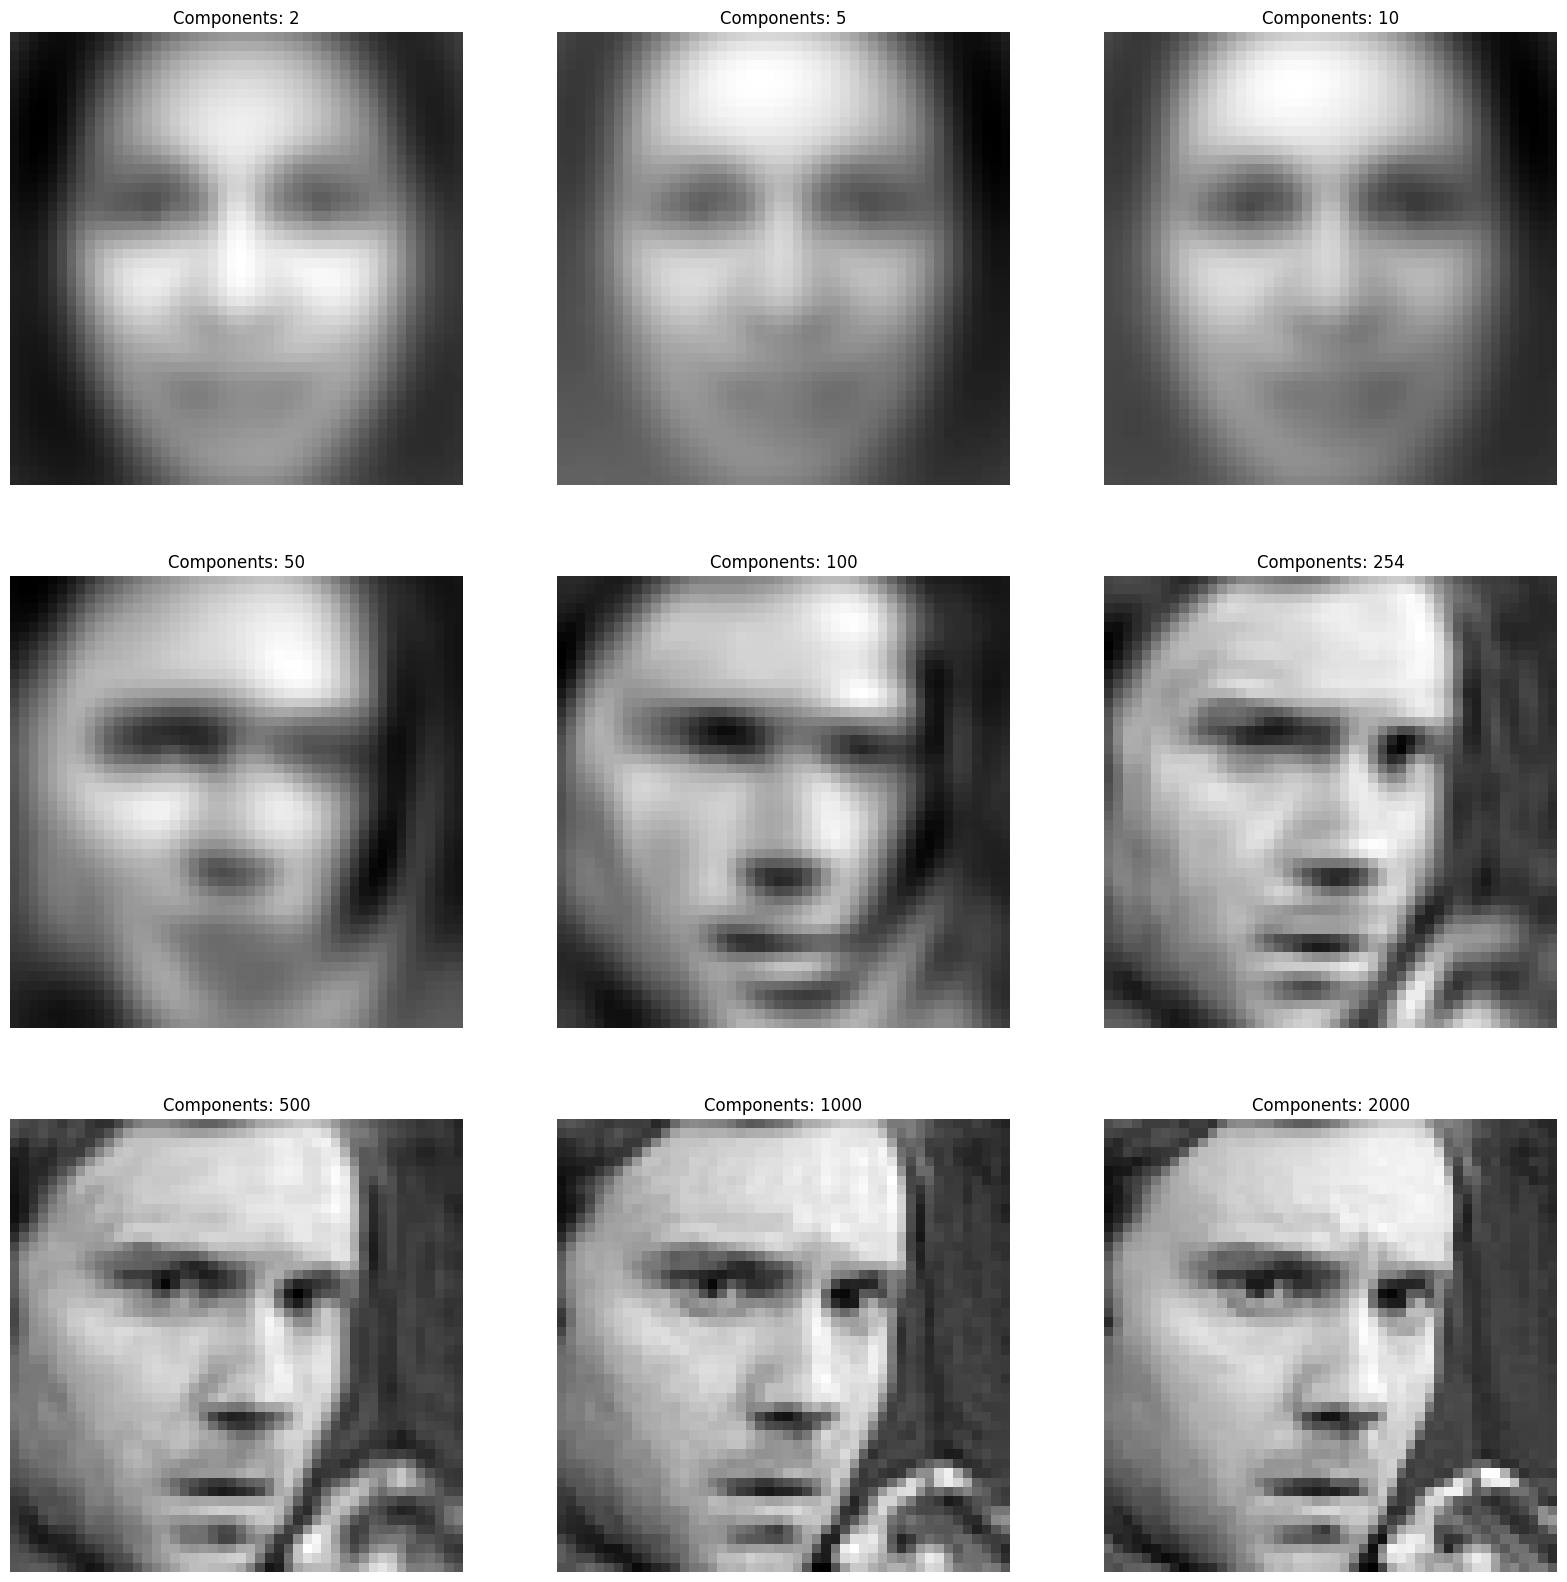

In [16]:
components = [2, 5, 10, 50, 100, 254, 500, 1000, 2000]
plt.figure(figsize=(20, 20))

for component in components:
    plt.subplot(3, 3, components.index(component)+1)
    pca = PCA(n_components=component)
    pca.fit(images.reshape(images.shape[0], -1))
    plot_pca_single_image(pca, images[0])
    plt.title("Components: {}".format(component))
    plt.axis('off')

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

In [17]:
pca = PCA(n_components=254)
transformed_data = pca.fit_transform(images.reshape(images.shape[0], -1))

## 3. Image Classification

The classification task will compare the performance using both:

- Original data: The data before applying PCA.
- Transformed data: The data projected onto the optimal number of principal components identified earlier. Utilize the **optimal number of principal components** identified in the previous question.

Compare the performance of **4** different classification algorithms (3 machine learning and 1 MLP models) in both formats above. (4 points)

Perform hyperparameter tuning using ```GridSearchCV``` for each classification method. (1 point)

Inspiration: Draw inspiration from the example provided in the scikit-learn documentation: https://scikit-learn.org/dev/auto_examples/datasets/plot_iris_dataset.html

In [22]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # Add more metrics as needed
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [18]:
# splitting data into train/test subsets here
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_data, labels, test_size=0.2, random_state=42)

In [20]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [21]:
# Reshape X_train, X_val, X_test
X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [23]:
# Example hyperparameter grids (adjust based on algorithms)
# logistic_params = {'C': [0.001, 0.01, 0.1, 1, 10], 'solver': ['lbfgs', 'newton-cg']}
# svm_params = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': [0.01, 0.1, 1]}
# random_forest_params = {'n_estimators': [100, 200, 500], 'max_depth': [4, 8, 12]}
# mlp_params = {'hidden_layer_sizes': [(100,), (100, 50), (100, 50, 25)], 'activation': ['relu', 'tanh']}

logistic_params = {'C': [0.001], 'solver': ['lbfgs']}
knn_params = {'n_neighbors': [3]}
random_forest_params = {'n_estimators': [100], 'max_depth': [4]}
mlp_params = {'hidden_layer_sizes': [(100,)], 'activation': ['relu']}

classifiers = [
    GridSearchCV(LogisticRegression(), logistic_params),
    GridSearchCV(KNeighborsClassifier(), knn_params),
    GridSearchCV(RandomForestClassifier(), random_forest_params),
    GridSearchCV(MLPClassifier(), mlp_params)
]

algorithm_names = ["Logistic Regression", "KNN", "Random Forest", "MLP"]

In [24]:
clf_store = {
    "Logistic Regression": None,
    "KNN": None,
    "Random Forest": None,
    "MLP": None
}

for i, clf in enumerate(classifiers):
    print(f"Training {algorithm_names[i]}...")
    clf.fit(X_train, y_train)

    print(f"Evaluating {algorithm_names[i]}...")
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Adjust 'average' as needed
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
    clf_store[algorithm_names[i]] = clf

Training Logistic Regression...


/home/lelouvincx/Downloads/Fundamental-ML/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/lelouvincx/Downloads/Fundamental-ML/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

Evaluating Logistic Regression...
Accuracy: 0.3631, Precision: 0.3478, Recall: 0.3631, F1-Score: 0.3462
Training KNN...
Evaluating KNN...
Accuracy: 0.3447, Precision: 0.3630, Recall: 0.3447, F1-Score: 0.3449
Training Random Forest...
Evaluating Random Forest...
Accuracy: 0.2485, Precision: 0.2382, Recall: 0.2485, F1-Score: 0.1023
Training MLP...


/home/lelouvincx/Downloads/Fundamental-ML/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/lelouvincx/Downloads/Fundamental-ML/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lelouvincx/Downloads/Fundamental-ML/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Evaluating MLP...
Accuracy: 0.3898, Precision: 0.3882, Recall: 0.3898, F1-Score: 0.3829


## 4. Evaluating Classification Performance

Compare the performance of the different classification models using various metrics: accuracy, precision, recall, and F1-score.
Based on the evaluation metrics, explain which model performs best and why. Identify the emotion category where the model makes the most accurate and most errors. (1 point)



In [26]:
clf_store

{'Logistic Regression': GridSearchCV(estimator=LogisticRegression(),
              param_grid={'C': [0.001], 'solver': ['lbfgs']}),
 'KNN': GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors': [3]}),
 'Random Forest': GridSearchCV(estimator=RandomForestClassifier(),
              param_grid={'max_depth': [4], 'n_estimators': [100]}),
 'MLP': GridSearchCV(estimator=MLPClassifier(),
              param_grid={'activation': ['relu'],
                          'hidden_layer_sizes': [(100,)]})}

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

for name,clf in clf_store.items():
    # Get predictions for the test set using the trained model
    y_pred = clf.predict(X_test)

    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Print the confusion matrix
    print(f"\nConfusion Matrix for {name}:")
    print(cm)

    # Generate classification report
    report = classification_report(y_test, y_pred)

    # Print the classification report
    print(f"\nClassification Report for {name}:")
    print(report)


Confusion Matrix for Logistic Regression:
[[ 97   3  41 110  89  77  63]
 [  8   5  12   9   7  13   6]
 [ 67   0  72 101  76 120  79]
 [ 72   2  37 508 100  87  77]
 [ 86   3  46 119 168  67 108]
 [ 19   1  26  50  26 245  30]
 [ 63   2  41 156 104  83 208]]

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.24      0.20      0.22       480
           1       0.31      0.08      0.13        60
           2       0.26      0.14      0.18       515
           3       0.48      0.58      0.52       883
           4       0.29      0.28      0.29       597
           5       0.35      0.62      0.45       397
           6       0.36      0.32      0.34       657

    accuracy                           0.36      3589
   macro avg       0.33      0.32      0.30      3589
weighted avg       0.35      0.36      0.35      3589


Confusion Matrix for KNN:
[[189  10  61 105  37  19  59]
 [ 12  36   4   2   1   0   5]
 [ 96

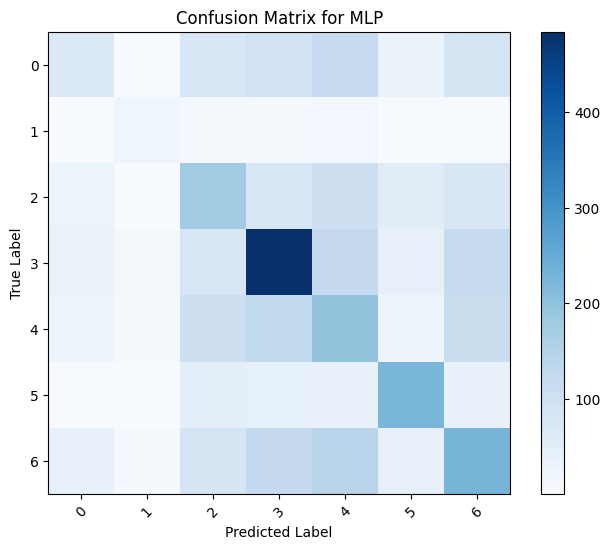

In [28]:
# Create a heatmap of the confusion matrix
y_pred = clf_store['MLP'].predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xticks(range(len(np.unique(y_test))), np.unique(y_test), rotation=45)
plt.yticks(range(len(np.unique(y_test))), np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix for {algorithm_names[i]}')
plt.grid(False)
plt.show()

In [29]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

def analyze_model_performance(y_test, y_pred, class_names):
    """
    Analyzes the confusion matrix and classification report to identify emotion categories
    where the model makes the most accurate and most error-prone predictions.

    Args:
        y_test (array-like): True labels for the test set.
        y_pred (array-like): Predicted labels by the model for the test set.
        class_names (list): List of emotion category names.

    Returns:
        tuple: A tuple containing two dictionarys:
            - most_accurate: Emotion category with highest accuracy.
            - most_errors: Emotion category with the most misclassifications.
    """

    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)

    most_accurate = {}
    most_errors = {}

    # Find category with highest accuracy (diagonal element)
    highest_accuracy = np.max(cm.diagonal())
    for i, class_name in enumerate(class_names):
        if cm[i, i] == highest_accuracy:
            most_accurate['category'] = class_name
            most_accurate['accuracy'] = highest_accuracy / np.sum(cm[i, :])
            most_accurate['precision'] = report[class_name]['precision']
            most_accurate['recall'] = report[class_name]['recall']
            break  # Stop iterating after finding the first occurrence

    # Find category with the most misclassifications (sum of off-diagonal elements in its row)
    most_errors['category'] = class_names[0]  # Initialize with first category
    most_errors['count'] = 0
    for i in range(len(cm)):
        row_sum = np.sum(cm[i, :]) - cm[i, i]  # Exclude diagonal element
        if row_sum > most_errors['count']:
            most_errors['category'] = class_names[i]
            most_errors['count'] = row_sum

    return most_accurate, most_errors

y_pred = clf_store['MLP'].predict(X_test)
class_names = np.unique(y_test)  # Assuming class labels are used directly

most_accurate, most_errors = analyze_model_performance(y_test, y_pred, class_names)

print("Emotion category with the most accurate predictions:")
print(most_accurate)

print("\nEmotion category with the most misclassifications:")
print(most_errors)

Emotion category with the most accurate predictions:
{'category': np.int64(3), 'accuracy': np.float64(0.5481313703284258), 'precision': 0.5052192066805845, 'recall': 0.5481313703284258}

Emotion category with the most misclassifications:
{'category': np.int64(6), 'count': np.int64(429)}
